# Homework 5 #
### Robin James ###
## Problem 1 ##
### Part i ###
Center Diffrencing:
$$ f'(y) = \frac{y(t+\Delta t)-y(t- \Delta t)}{2\Delta t} $$

We are given $\frac{dy}{dt}=-f(y(t),t) $ so we can say
$$ \frac{y(t+\Delta t)-y(t-\Delta t)}{2\Delta t}= -f(y,t) $$
Solving for $y(t+\Delta t) $
$$y(t+ \Delta t)= -2\Delta tf(y,t)+y(t-\Delta t) $$
$$y_{n+1}= y_{n-1}-2\Delta tf(y_n,t_n) $$

 ### Part ii ###
$$y_{n+1}= y_{n-1}-2\Delta tf(y_n,t_n) $$
Substitute $y_n=\delta y_n+ y_n^{true} $
$$\delta y_{n+1}+ y_{n+1}^{true}= \delta y_{n-1}+ y_{n-1}^{true}-2\Delta tf(\delta y_n+ y_n^{true},t_n) $$
For small values of $\delta y_n $ we can taylor expand out $f(y_n,t_n)$
$$\delta y_{n+1}+ y_{n+1}^{true}= \delta y_{n-1}+ y_{n-1}^{true}-2\Delta tf(y^{true}_n,t_n)- 2\Delta t \frac { \partial f}{ \partial n} |_n \delta y_n) $$
We then assume that the leap fog step works for $y^{true}$ letting:
 $$\delta y_{n+1}= \delta y_{n-1}- 2\Delta t \frac { \partial f}{ \partial n} |_n \delta y_n $$
 or
 $$\delta y_{n+1}=\beta \delta y_{n-1}  $$
 where
 $$ \beta = (1- 2\Delta t \frac { \partial f}{ \partial n} |_n ) $$

### Part iii ###
To be stable $ |\beta| \le 1$
$$ -1 \le (1- 2\Delta t \frac { \partial f}{ \partial n} |_n ) \le 1 $$

This gives
$$ 2 \ge 2\Delta t \frac { \partial f}{ \partial n} |_n $$
So leap frog is stable if $ \Delta t \le \frac{1}{\frac { \partial f}{ \partial n} |_n} $
## Problem 2 ##

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
rng= np.random.default_rng()

In [35]:
def rk2(f, y0, t, args=(),):
    """
    valuates a first order differential equation using the second order Runge-Kutta algorithm
    :param f: function that can be called f(t,y,*args) and is a first order  differential equation
    :param y0: initial value
    :param t: array of times
    :param args: extra argument for f
    :return: array of y values
    """

    y =np.zeros_like(t)

    y[0]=y0
    for i in range(len(t) - 1):
        deltat = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)*deltat
        k2 = f(y[i] + k1 * deltat / 2., t[i] + deltat / 2., *args)*deltat
        y[i+1]=k2+y[i]
    return y




def rk4(f,y0,t,args=()):
    """
    valuates a first order differential equation using the forth order Runge-Kutta algorithm
    :param f: function that can be called f(t,y,*args) and is a first order  differential equation
    :param y0: initial value
    :param t: array of times
    :param args: extra argument for f
    :return: array of y values
    """

    y = np.zeros_like(t)
    y[0] = y0
    for i in range(len(t) - 1):
        deltat = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args) *deltat
        k2 = f(y[i] + k1  / 2., t[i] + deltat / 2., *args) *deltat
        k3 = f(y[i] + k2  / 2., t[i] + deltat / 2., *args)*deltat
        k4 = f(y[i] + k3 , t[i] + deltat, *args)* deltat
        y[i+1] = y[i] +  (k1 + 2*k2 + 2*k3 + k4)/6
    return y

## Problem 3 ##
### Part i ###
$$\frac{dy}{dt}+12y=6t^2-t $$
Solve this equation as a linear equation, first define $\mu(t)$ as
    $$\mu(t) = e^{12t} $$
Multiply both sides by $\mu(t)$
$$e^{12t}\frac{dy}{dt}+12e^{12t}y=e^{12t}(6t^2-t) $$
$$e^{12t}\frac{dy}{dt}+\frac{d}{dt}e^{12t}y=-e^{12t}(-6t^2+t) $$
$$\frac{d}{dt}(e^{12t}y(t))=-e^{12t}(-6t^2+t) $$
$$\int \frac{d}{dt}(e^{12t}y(t)) dt=\int -e^{12t}(-6t^2+t) dt $$
Solve and divide by $\mu(t)$ to get:
$$y(t)=\frac{t^2}{2}-\frac{t}{6}+ce^{-12t}+\frac{1}{72} $$
Then we must solve for c by using the inital condition $y(0)=\frac{1}{24}$
$$\frac{1}{24}=c+\frac{1}{72} $$
$$ c= \frac{1}{36} $$
### Part ii/iii ##

At t=0.2s, the true value is 0.0030754987024836835, the rk2 value is 0.0028250802439662203, and rk4 value is 0.003075500267447451. This means that there is a 2.5041845851746323e-04 error for rk2 and a 1.5649637675162198e-09 error for rk4.


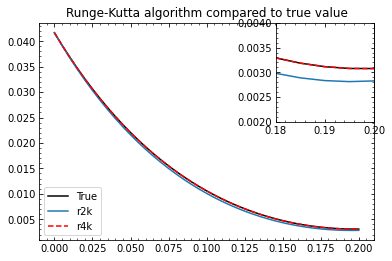

In [90]:
def diffeq(y,t,args=()):
    return 6*t**2-t-12*y
def f(t):
    return t**2/2-t/6+(1/36)*np.exp(-12*t)+1/72
t=np.arange(0,0.2+0.005,0.005)
y0=1/24
r2=rk2(diffeq,y0,t)
r4=rk4(diffeq,y0,t)
fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,f(t),'k', label='True')
ax.plot(t,r2, label='r2k')
ax.plot(t,r4,'r--', label='r4k')
ax1=fig.add_subplot(2,3,3)
ax1.plot(t,f(t),'k', label='True')
ax1.plot(t,r2, label='r2k')
ax1.plot(t,r4,'r--', label='r4k')
ax1.set_xlim(0.180, 0.2)
ax1.set_ylim(0.002,0.004)

ax.set_title("Runge-Kutta algorithm compared to true value")

ax.legend(loc='lower left')
print(f'At t=0.2s, the true value is {f(0.2)}, the rk2 value is {r2[-1]}, and rk4 value is {r4[-1]}. This means that there is a {np.format_float_scientific(np.abs(r2[-1]-f(.2)))} error for rk2 and a {np.format_float_scientific(np.abs(r4[-1]-f(.2)))} error for rk4.')